In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [48]:
df_train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [49]:
df_test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# Data Analysis

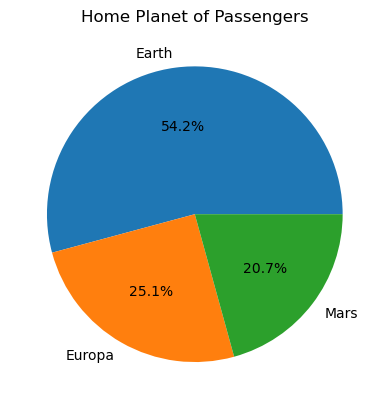

In [50]:
plt.pie(df_train['HomePlanet'].value_counts().values, labels = df_train['HomePlanet'].value_counts().index, autopct = '%1.1f%%')
plt.title('Home Planet of Passengers')
plt.show()

**As can seen from the pie chart, most of the passengers were from Earth**

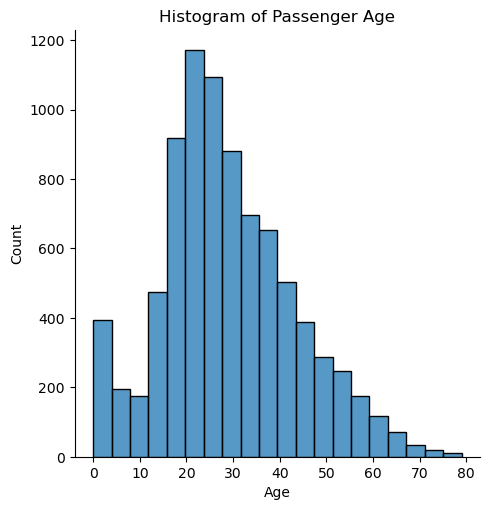

In [51]:
sns.displot(data = df_train, x = 'Age', bins = 20)
plt.title('Histogram of Passenger Age')
plt.show()

**Most of the passengers were between 20-30 years old**

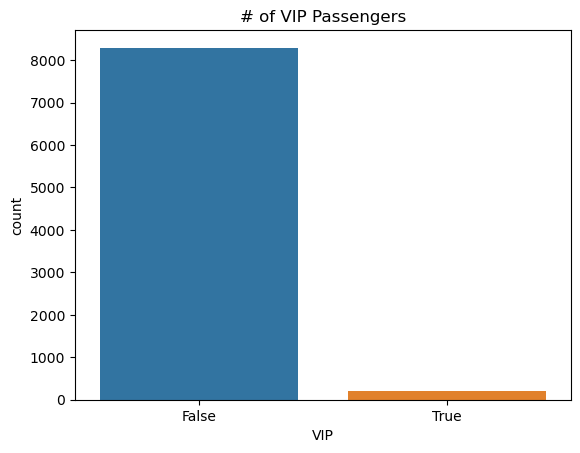

In [52]:
sns.countplot(data = df_train, x = 'VIP')
plt.title('# of VIP Passengers')
plt.show()

**Most of the passengers were not VIP**

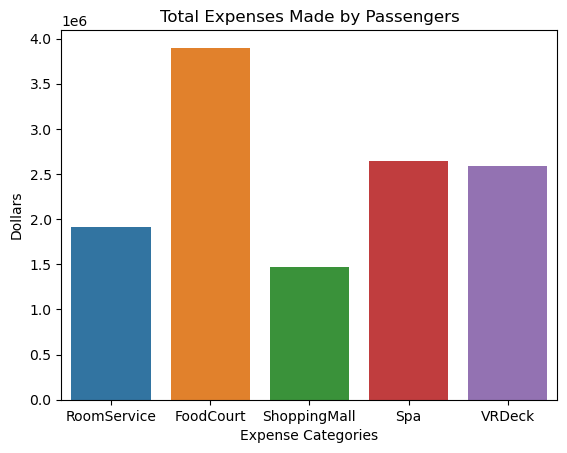

In [53]:
total_roomserv = df_train['RoomService'].sum()
total_foodcourt = df_train['FoodCourt'].sum()
total_shopmall = df_train['ShoppingMall'].sum()
total_spa = df_train['Spa'].sum()
total_vrdeck = df_train['VRDeck'].sum()

expenses = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

total_expenses = [total_roomserv, total_foodcourt, total_shopmall, total_spa, total_vrdeck]

sns.barplot(x = expenses, y = total_expenses)
plt.xlabel('Expense Categories')
plt.ylabel('Dollars')
plt.title('Total Expenses Made by Passengers')
plt.show()

**As can be seen from the bar plot, passengers spent the most in the 'FoodCourt' area.**

# Model

In [54]:
# Train-test split
# Since PassengerId, Cabin, Name do not have an effect on Transportation I removed them from train and test dataset.
y_train = df_train['Transported']

X_train = df_train.drop(['PassengerId', 'Cabin', 'Name', 'Transported'], axis = 1)

X_test = df_test.drop(['PassengerId', 'Cabin', 'Name'], axis = 1)

In [55]:
# Filling nan values with mean of that specific column in numerical features in dataset
num_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for j in num_features:
    X_train[j] = X_train[j].fillna(X_train[j].mean())
    X_test[j] = X_test[j].fillna(X_test[j].mean())

# Filling nan values with the most used value of that specific column in categorical features in dataset
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for i in cat_features:
    X_train[i].fillna(X_train[i].mode()[0], inplace = True)
    X_test[i].fillna(X_test[i].mode()[0], inplace = True)

In [56]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [59]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4, 6]
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

Best Parameters: {'max_depth': 10, 'min_samples_split': 6, 'n_estimators': 100}
Best Score: 0.7960453046636726


In [62]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
